In [1793]:
from data_loader import load_latest_iteration, load_all_files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1794]:
# bbpgd_data = load_all_files(
#     f"../code/cpp/build/src/logs/data", "bbpgdtrace")

In [1795]:
bbpgd_data["iteration"] = bbpgd_data["iteration"] - 1

In [1796]:
import pandas as pd

# Create synthetic row
extra_row = pd.DataFrame([{
    'iteration': -1,
    'total_constraints': 0
}])

# Make sure other columns exist so Seaborn doesn’t complain
for col in bbpgd_data.columns:
    if col not in extra_row.columns:
        extra_row[col] = None

# Concatenate and sort by iteration
bbpgd_data_extended = pd.concat(
    [extra_row, bbpgd_data], ignore_index=True).sort_values('iteration')

/tmp/ipykernel_515023/3742320708.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bbpgd_data_extended = pd.concat(


In [1797]:
bbpgd_data = bbpgd_data_extended

In [1844]:
import seaborn as sns

tolerance = 1e-3


def makeplot(data, x, y, xlabel=None, ylabel=None, outname=None, variable="density",
             xscale=None, yscale=None,
             **kwargs):

    fig, ax = plt.subplots(figsize=(10, 6))
    outname = outname or f"{y}_vs_{x}.png"

    sns.lineplot(data, x=x,                 y=y,
                 ax=ax, **kwargs, ms=10, color="purple", palette=("purple",), legend=True, label=ylabel)

    if xscale:
        ax.set_xscale(xscale)
    if yscale:
        ax.set_yscale(yscale)

    ax.set_xlabel(xlabel or x, fontsize=20)
    ax.set_ylabel(ylabel or y, fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(True)
    # ax.legend(fontsize=22)

    if outname:
        fig.savefig(outname, dpi=300, bbox_inches="tight")

    return fig, ax

In [1799]:
bbpgd_data

,iteration,total_constraints,step,recursive_iteration,residual,step_size,linear,quadratic,growth,total,x,y,z,rank
1,-2,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
0,-1,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
2,-1,152656,0,0,0.019677,50.8203,-1.49539,0.449708,6292.20,6291.16,None,None,None,0
3,0,152656,1,0,0.017815,50.8203,-2.04109,0.697620,6287.32,6285.98,None,None,None,0
4,1,152656,2,0,0.008259,445.9090,-6.67188,7.830560,6245.82,6246.98,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,781,404544,144,4,0.002686,99.8160,-3682.63000,1155.820000,1397.05,-1129.76,None,None,None,0
785,782,404544,145,4,0.005054,188.1880,-3683.21000,1156.170000,1396.89,-1130.15,None,None,None,0
786,783,404544,146,4,0.002237,48.9816,-3683.37000,1156.120000,1396.85,-1130.40,None,None,None,0
787,784,404544,147,4,0.002487,69.5403,-3683.58000,1156.160000,1396.79,-1130.64,None,None,None,0


/tmp/ipykernel_515023/3964778265.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data, x=x,                 y=y,


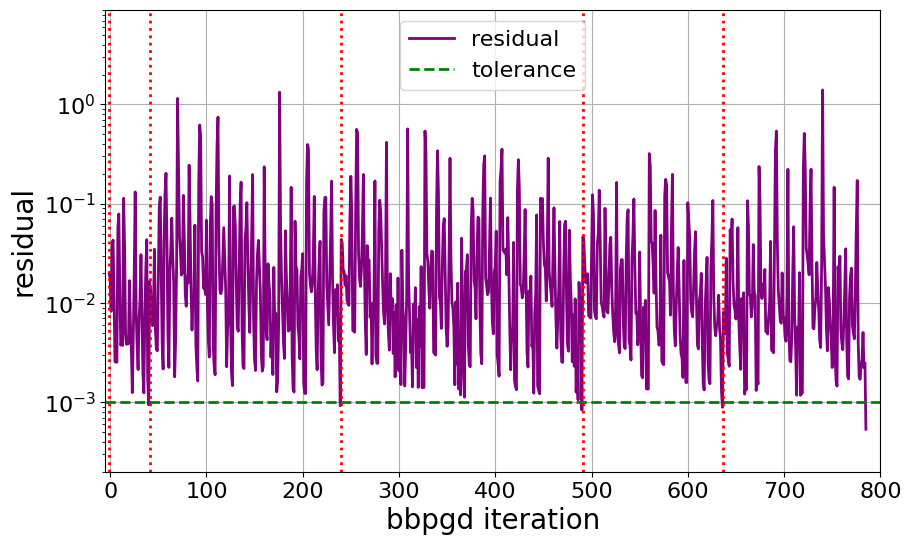

In [1856]:
# Create main plot
import matplotlib.ticker as mticker
fig, ax = makeplot(bbpgd_data, x='iteration', y='residual',
                   xlabel='bbpgd iteration',
                   ylabel='residual', outname='bbpgd_residual.png', lw=2)

ax.set_ylim(2e-4, 9)
ax.set_yscale('log')
ax.set_xlim(-5, 800)


# Add tolerance line
ax.axhline(y=tolerance, color='green', linestyle='--',
           label='tolerance', linewidth=2)


# make hvline wherever step=0
for i, row in bbpgd_data.iterrows():
    if row['step'] == 0 and row['iteration'] != bbpgd_data['iteration'].min():
        ax.axvline(x=row['iteration'], color='red', linestyle=':',
                   linewidth=2)

# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.legend(lines, labels, fontsize=16, loc='upper center')

fig.savefig('bbpgd_residual.png', dpi=300, bbox_inches="tight")

/tmp/ipykernel_515023/3964778265.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data, x=x,                 y=y,
/tmp/ipykernel_515023/2423651224.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Spectral')


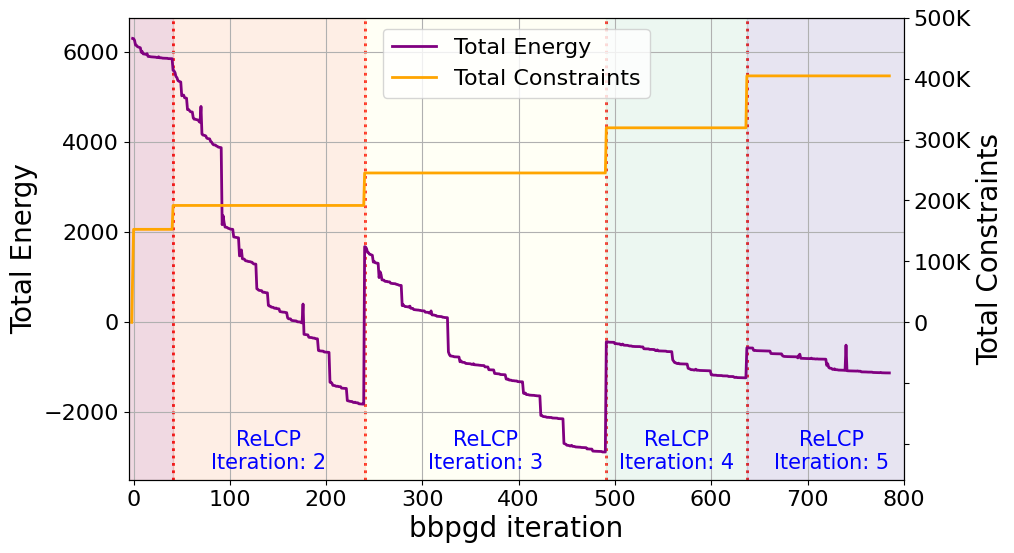

In [1859]:
# Create main plot
import matplotlib.cm as cm
fig, ax = makeplot(bbpgd_data, x='iteration', y='total',
                   xlabel='bbpgd iteration',
                   ylabel='Total Energy', outname='bbpgd_total_energy.png', lw=2)


ax2 = ax.twinx()
sns.lineplot(data=bbpgd_data, x='iteration', y='total_constraints',
             ax=ax2, color='orange', lw=2, label='Total Constraints')
ax2.set_ylabel('Total Constraints', fontsize=20)
ax2.tick_params(axis='y', labelsize=16)


def millions_formatter(x, pos):
    """Format large numbers in millions with 'M' suffix."""
    if x<0:
        return ""
    if x >= 1e6:
        return f'{x/1e6:.0f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:.0f}'
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, pos: millions_formatter(x, pos)))

# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels() if 'ax2' in locals() else ([], [])
ax.get_legend().remove()
ax2.get_legend().remove()
ax.legend(lines + lines2, labels + labels2, fontsize=16, loc='upper center')

# Get all rows where step == 0
step0_rows = bbpgd_data[bbpgd_data['step'] == 0].reset_index(drop=True)
num_sections = len(step0_rows)   # number of shaded sections
cmap = cm.get_cmap('Spectral')

prev_iteration = -20
for idx in range(len(step0_rows)):
    row = step0_rows.loc[idx]
    current_iteration = row['iteration']

    if idx > 0:
        # Draw vertical line
        ax.axvline(x=current_iteration, color='red',
                   linestyle=':', linewidth=2, zorder=-5)

        # Compute normalized value between 0 and 1 for this section
        norm_val = (idx - 1) / max(num_sections -
                                   1, 1)  # avoid division by zero
        color = cmap(norm_val)

        ax.axvspan(prev_iteration, current_iteration, color=color, alpha=0.15)

        if current_iteration - prev_iteration >= 90:
            midpoint = (prev_iteration + current_iteration) / 2
            ymin, ymax = ax.get_ylim()
            value = row['recursive_iteration']
            ax.text(midpoint, ymin - 0.0*(ymax-ymin),
                    f'ReLCP\nIteration: {int(value)}',
                    color='blue', ha='center', va='bottom', fontsize=15)

        prev_iteration = current_iteration

# Shade the region after the last step==0 point
current_iteration = step0_rows.iloc[-1]['iteration']
norm_val = 1.0
ax.axvspan(current_iteration, bbpgd_data['iteration'].max()+200,
           color=cmap(norm_val), alpha=0.15)
ymin, ymax = ax.get_ylim()
value = step0_rows.iloc[-1]['recursive_iteration']
ax.text(bbpgd_data['iteration'].max()-60, ymin - 0.0*(ymax-ymin),
        f'ReLCP\nIteration: {int(value+1)}',
        color='blue', ha='center', va='bottom', fontsize=15)


ax.set_ylim(-3500, None)
ax2.set_ylim(ax2.get_ylim()[0] - 0.535 * np.ptp(ax2.get_ylim()),
             500000)


ax.set_xlim(-5, 800)
ax2.set_xlim(-5, 800)
fig.savefig('bbpgd_total_energy.png', dpi=300, bbox_inches="tight")